# 02. Gradient Descent
### (Theory, Intuition, and Implementation)

In machine learning, our goal is often to find the best parameters (weights and biases) for a model that accurately predicts outcomes.  This involves **minimizing a "cost function"** which measures how poorly our model is performing. Gradient Descent is a powerful and widely used **iterative algorithm that helps us find the minimum of this cost function**.  It works by taking small, calculated steps downhill along the cost function's surface, guided by the gradient (slope) at each point.

</br>

### Why is this approach so effective?
Gradient Descent is preferred because it's a relatively simple yet efficient way to **find the minimum of complex functions**, even when analytical solutions are impossible.  It's applicable in a wide range of machine learning models, including *linear regression, logistic regression, and neural networks*.

### Where to use Gradient Descent? How does it helps?
Specifically in **cost calculations**, gradient descent helps us find the parameters that **minimize the difference between our model's predictions and the actual values**, leading to a better fit.  Gradient Descent is typically employed when we have a **differentiable cost function and need to optimize model parameters**, making it a cornerstone of many machine learning algorithms.

#### Linear Regression Parameters & Functions
* Linear Function, $ f_{w,b}(x) = {y} = wx + b $ , or also known as, Predicted Function, $ \hat{y} = w_{pred}\cdot x + b_{pred} $
* Cost Function, $\text{J(w,b)} = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 $
</br>
</br>


#### Derivatives
* Partial Derivative of Cost with $w$,  $$ J(w,b) \text{ with } w =  \frac{\partial}{\partial w} J(w,b) = \frac{\partial}{\partial w} \left[{\frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2} \right] $$
</br>
$$ = \frac{\partial}{\partial w} J(w,b) = \frac{\partial}{\partial w} \left[ \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \right] $$
$$ = {2} \cdot \left[{ \frac{1}{2m} \sum_{i=1}^{m} [ {(f_{w,b}(x^{i})) - (w \cdot x + b)}] } \right] \cdot (x^{i})$$
$$ = \frac{1}{m} \sum_{i=1}^{m} \left[ {(f_{w,b}(x^{i})) - (wx + b)} \right] \cdot (x^{i}) $$
$$ \color{dodgerblue}{= \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)}) x^{(i)} ........^{(eq. 01)} } $$

* Similarly, Partial Derivative of Cost with $b$,  $$ J(w,b) \text{ with } b =  \frac{\partial}{\partial b} J(w,b) = \frac{\partial}{\partial b} [^{\frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2}] $$
</br>
$$ = \frac{\partial}{\partial b} [^{ \frac{1}{2m} \sum_{i=1}^{m} [ {(f_{w,b}(x^{i})) - (w \cdot x + b)}]^{2} }] $$
$$ = {2} \cdot [^{ \frac{1}{2m} \sum_{i=1}^{m} [ {(f_{w,b}(x^{i})) - (w \cdot x + b)}] }]$$
$$ = \frac{1}{m} \sum_{i=1}^{m} [ {(f_{w,b}(x^{i})) - (wx + b)}] $$
$$ \color{indigo}{= \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{i}) - y^{(i)}) ........^{(eq. 02)} } $$

</br>

#### Gradient Descent Updating Method
For each step towards training,</br>
$ w_{new} = w_{old} - \alpha \color{dodgerblue}{\frac{\partial}{\partial w} J(w,b)} = w_{old} - \alpha \cdot \color{dodgerblue}{(eq. 01)}$

$ b_{new} = b_{old} - \alpha \color{indigo}{\frac{\partial}{\partial b} J(w,b)} = b_{old} - \alpha \cdot \color{indigo}{(eq. 02)}$, where $ \alpha $ is the learning rate.
</br></br>

#### Correct way of Implementing Gradient Descent Algorithm

$\textbf{function}$ $ \textit{gradient_descent(𝛼, w, b)}:$

   1. $temp_{w}$ $← w - 𝛼 \cdot {\frac{\partial}{\partial w} J(w,b)}$ `   # store new w`
   2. $temp_{b}$ $← b - 𝛼 \cdot {\frac{\partial}{\partial b} J(w,b)}$ `   # store new b`
   3. $w ← temp_{w}$ `   # update new w`
   4. $b ← temp_{b}$ `   # update new b`


**It uses temporary variables to ensure that the updates for w and b are calculated based on the same (original) values, effectively achieving a simultaneous update in a sequential programming environment. By not emphasizing the use of temporary variables, it could have led to an incorrect implementation where w is updated before b, violating the simultaneous update rule in Gradient Descent.**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# let's create a linear function
X = np.arange(-50, 50, 0.1)
w = 0.6
b = 0

y = w * X + b

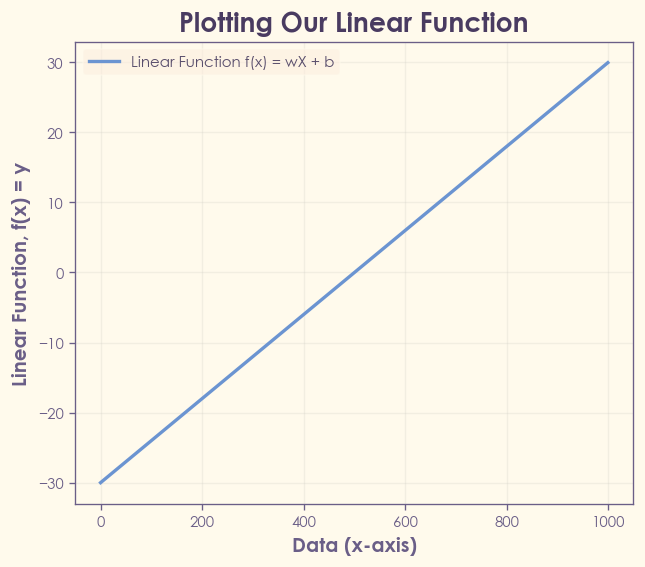

In [3]:
# let's plot the linear function
plt.figure(figsize=(6,5))
plt.title('Plotting Our Linear Function')
plt.plot(y, linewidth=2, label='Linear Function f(x) = wX + b')
plt.xlabel('Data (x-axis)')
plt.ylabel('Linear Function, f(x) = y')
plt.legend(prop={'size': 9})

In [4]:
# let's create a regression line with a random parameters

w_reg = np.random.rand()
print(f"Randomly selected W value for regresiion line: {w_reg}")

# create the regression line
y_hat = w_reg * X + b

Randomly selected W value for regresiion line: 0.9026225774092517


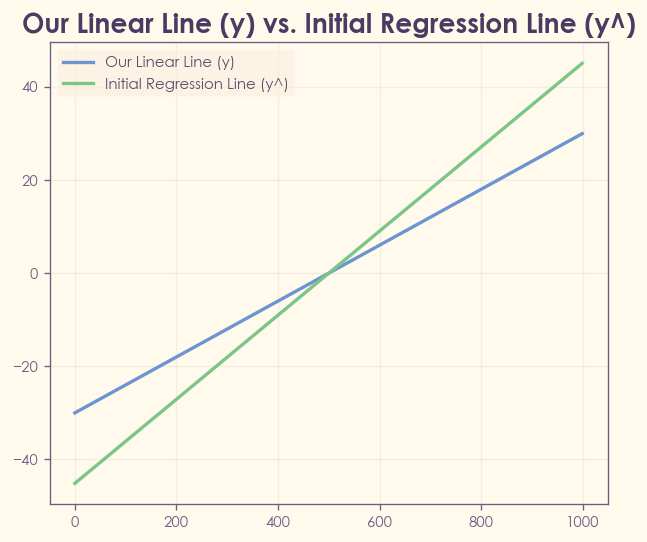

In [5]:
# visualize the two different linear lines (Our Linear Line vs. Initial Regression Line)
plt.figure(figsize=(6,5))
plt.title('Our Linear Line (y) vs. Initial Regression Line (y^)')
plt.plot(y, linewidth=2, label='Our Linear Line (y)')
plt.plot(y_hat, linewidth=2, label='Initial Regression Line (y^)')
plt.legend(prop={'size': 9})

In [7]:
# let's create a Cost Function, J for the regression
def CostFunction(y, y_hat):
    m = len(y)
    diff = y - y_hat
    cost = (1 / (2 * m)) * np.sum(diff**2)
    return cost